 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_path = Path('Resources/whale_returns.csv')
algo_returns_path = Path('Resources/algo_returns.csv')
sp_tsx_history_path = Path('Resources/sp_tsx_history.csv')

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale_returns_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sptsx_close_df = pd.read_csv(sp_tsx_history_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sptsx_close_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sptsx_close_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sptsx_close_df['Close'] = sptsx_close_df['Close'].str.replace(',', '', regex=True)
sptsx_close_df['Close'] = sptsx_close_df['Close'].str.replace('$', '', regex=True)
sptsx_close_df['Close'] = sptsx_close_df['Close'].astype(float)
sptsx_close_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sptsx_df = sptsx_close_df.pct_change()
sptsx_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sptsx_df = sptsx_df.rename(columns={'Close': 'S&P 500 TSX 60'})
sptsx_df.head()

,S&P 500 TSX 60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns
combined_daily_returns = pd.concat([whale_df, algo_df, sptsx_df], axis='columns', join='inner')
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

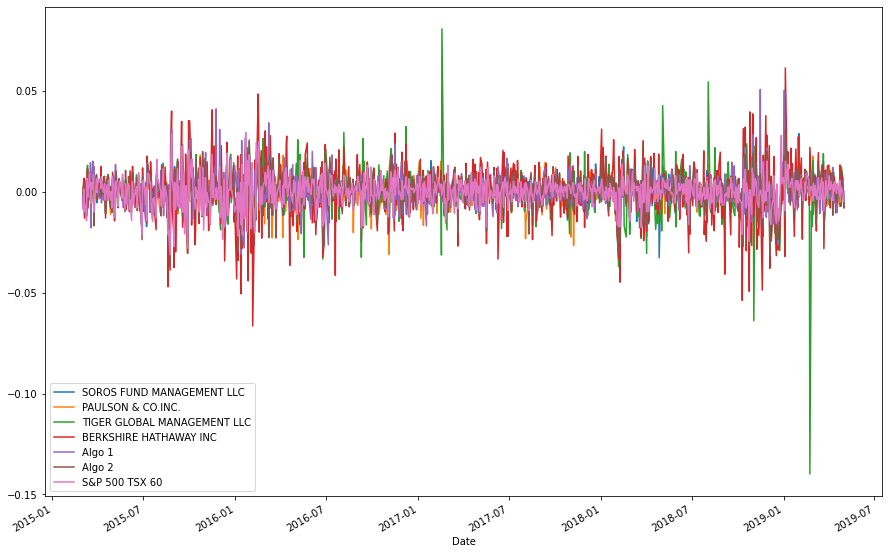

In [15]:
# Plot daily returns of all portfolios
combined_daily_returns.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

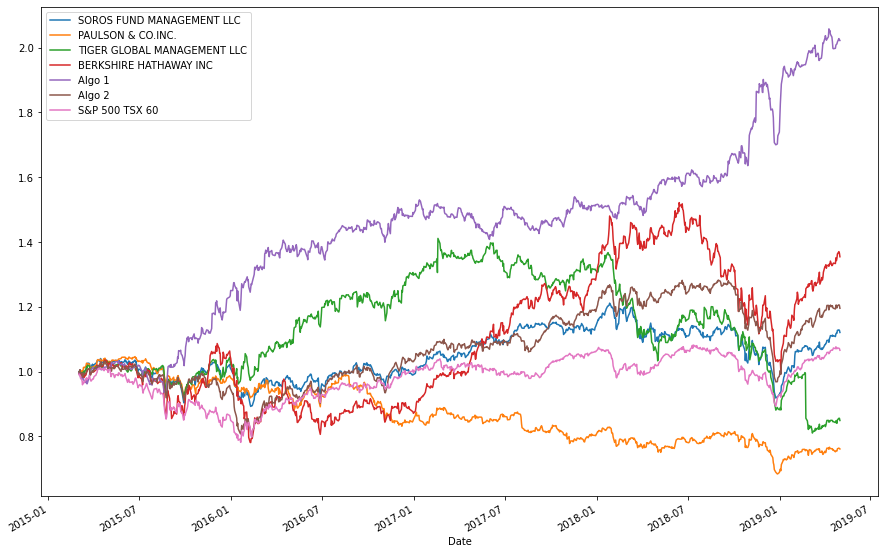

In [16]:
# Calculate cumulative returns of all portfolios
combined_cumulative = (1 + combined_daily_returns).cumprod()

# Plot cumulative returns
combined_cumulative.plot(figsize=(15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

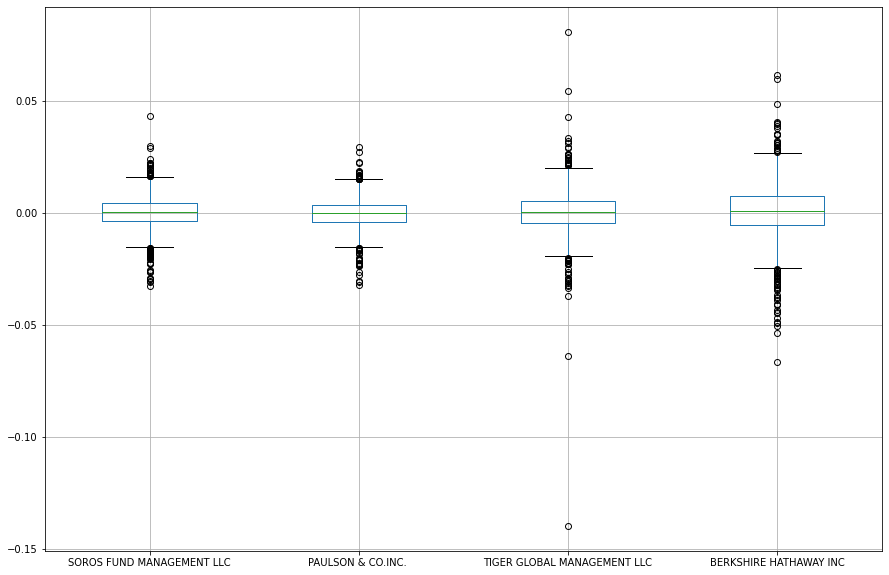

In [17]:
# Box plot to visually show risk
whale_df.boxplot(figsize=(15,10))

<AxesSubplot:>

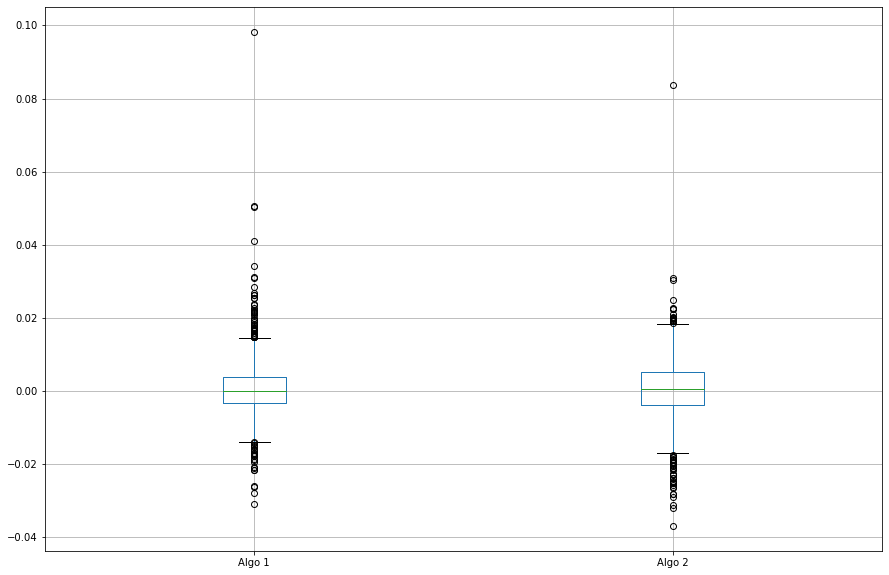

In [18]:
algo_df.boxplot(figsize=(15,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_df.std()
algo_std = algo_df.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_std = sptsx_df.std()

# Determine which portfolios are riskier than the S&P TSX 60
combined_std = pd.concat([whale_std, algo_std, sptsx_std])
combined_std = combined_std.sort_values()
combined_std

S&P 500 TSX 60                 0.006637
PAULSON & CO.INC.              0.006977
SOROS FUND MANAGEMENT LLC      0.007842
Algo 1                         0.007988
Algo 2                         0.008466
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [21]:
sptsx_std =  sptsx_std.iloc[0]
combined_std > sptsx_std

S&P 500 TSX 60                 False
PAULSON & CO.INC.               True
SOROS FUND MANAGEMENT LLC       True
Algo 1                          True
Algo 2                          True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

All portfolios are riskier than the S&P TSX 60 given they all have a higher daily standard deviation.

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_daily_returns.std() * np.sqrt(252)
annual_std = annual_std.sort_values()
annual_std

PAULSON & CO.INC.              0.110841
S&P 500 TSX 60                 0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

In [23]:
sptsx_std = annual_std.iloc[1]
annual_std > sptsx_std

PAULSON & CO.INC.              False
S&P 500 TSX 60                 False
Algo 1                          True
SOROS FUND MANAGEMENT LLC       True
Algo 2                          True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

However, when annualizing the standard deviation of all portfolios, only Paulson & Co. Inc. is slightly less risky than the S&P TSX 60.

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined_std = combined_daily_returns.rolling(window=21).std()

<AxesSubplot:xlabel='Date'>

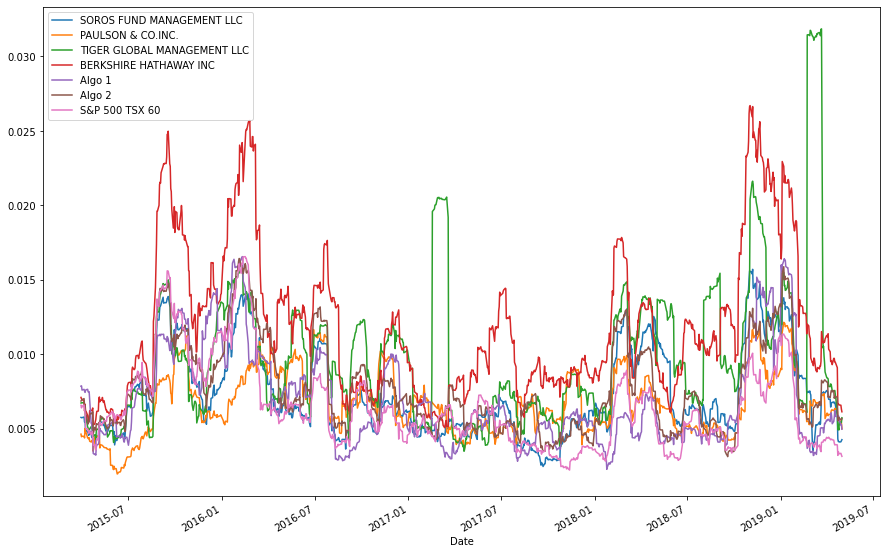

In [25]:
# Plot the rolling standard deviation
combined_daily_returns.rolling(window=21).std().plot(figsize=(15,10))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
returns_correlation = combined_daily_returns.corr()
# Display the correlation matrix
returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P 500 TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

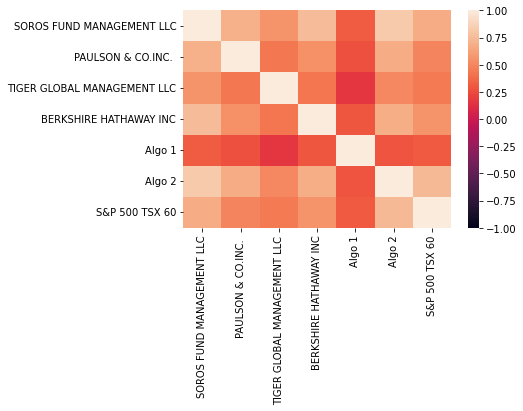

In [27]:
import seaborn as sns
sns.heatmap(returns_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [28]:
# Calculate covariance of a single portfolio
berkshire_hathaway_cov = combined_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_daily_returns['S&P 500 TSX 60'])

In [29]:
# Calculate variance of S&P TSX
sptsx_var = combined_daily_returns['S&P 500 TSX 60'].rolling(window=60).var()

In [30]:
# Computing beta
berkshire_hathaway_beta = berkshire_hathaway_cov / sptsx_var

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Berkshire Hathaway Returns'}, xlabel='Date'>

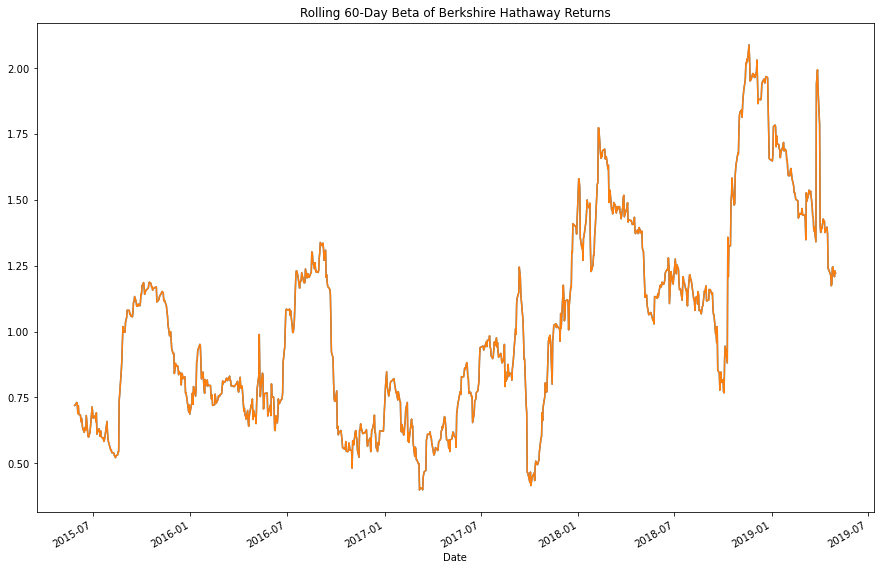

In [31]:
# Plot beta trend
ax = berkshire_hathaway_beta.plot(figsize=(15,10), title="Rolling 60-Day Beta of Berkshire Hathaway Returns")
berkshire_hathaway_beta.plot(ax=ax)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

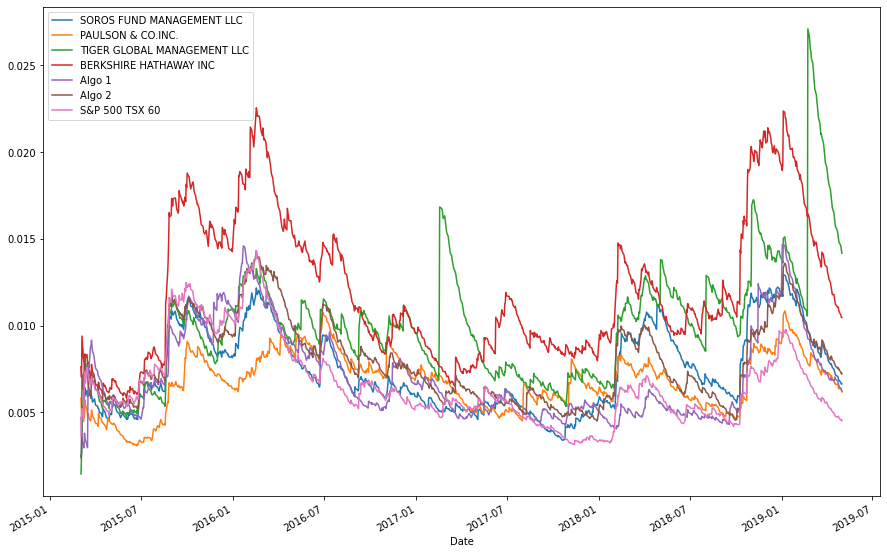

In [32]:
# Use `ewm` to calculate the rolling window
combined_daily_returns.ewm(halflife=21).std().plot(figsize=(15,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 TSX 60
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,0.007454,0.006770,0.010078,0.012072,0.007138,0.007963,0.006658
std,0.002356,0.001628,0.003505,0.004165,0.002586,0.002355,0.002385
min,0.002472,0.003055,0.001441,0.005798,0.002947,0.002380,0.003137
25%,0.005454,0.005534,0.007317,0.008759,0.005134,0.005971,0.005177
50%,0.006765,0.006921,0.009973,0.010842,0.006127,0.007458,0.005953
75%,0.009285,0.007997,0.011526,0.014860,0.008929,0.009612,0.007498
max,0.012938,0.010838,0.027104,0.022552,0.014672,0.014314,0.014309


---

# Sharpe Ratios
In reality, investment managers and their institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_daily_returns.mean()  * 252) / annual_std
sharpe_ratios

Algo 1                         1.491514
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
PAULSON & CO.INC.             -0.547594
S&P 500 TSX 60                 0.195550
SOROS FUND MANAGEMENT LLC      0.286709
TIGER GLOBAL MANAGEMENT LLC   -0.144455
dtype: float64

<AxesSubplot:>

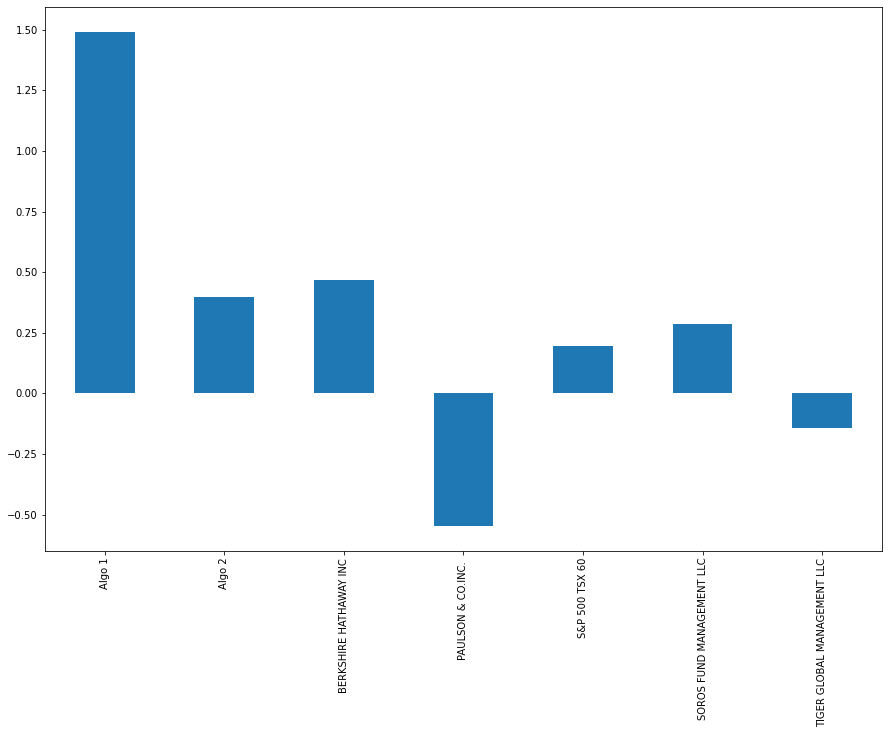

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(15,10), kind='bar')

In [55]:
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
S&P 500 TSX 60                 0.195550
SOROS FUND MANAGEMENT LLC      0.286709
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

In order to assess the algorithmic strategies, let's break down the evaluated metrics:

1. 21-day & Annualized Standard Deviation (SD) - 
    Algo 1 falls in the middle of the pack with a 21-day SD of 0.8% and annualized SD of 12%. Algo 2 also falls in the middle of the pack with 0.8% and 13%, respectively. Both are not the most volatile nor the least in these measures.
    
2. Correlation - 
    Algo 1 is the least positively correlated compared to every other portfolio and the S&P TSX 60. Algo 2 is postively correlated with the Soros Management Fund and the S&P TSX 60 at 83% and 73%, respectively. It is the least positively correlated with Algo 1 at 28.5%.
    
4. Boxplot - 
    Algo 1's box plot displays the most positive amd highest cumulative returns compared to all other portfolios. Algo 2's boxplot displays a large number cumulative losses.

5. Sharpe Ratio -
    Algo 1's Sharpe ratio sits at 1.49. The runner-up is Berkshire Hathaway at 0.47. While Algo 2 sits in 3rd place of the group at 0.39.
    
6. Exponentially Weighted Moving Average (EWM) with 21day Halflife -
    However in this metric, both Algo 1 has a greater drawdown than Algo 2, but the overall top performers are Berkshire Hathaway and Tiger Global.
    
Overall, Algo 1 outperforms all portfolios by a significant margin in this performance analysis. While Algo 2 falls behind Berkshire Hathaway for 2nd best performing. The only caveat is that in the EWM metric they experience a major drawdown and slip behind Berkshire Hathaway and Tiger Global who become the top performers.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [35]:
# Reading data from 1st stock
shop_path = Path('Resources/shop_historical_2015-2021.csv')
shop_df = pd.read_csv(shop_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
shop_df = shop_df.rename(columns={'Close': 'SHOP'})
shop_df.head()

,SHOP
Date,
2015-05-21 16:00:00,31.25
2015-05-22 16:00:00,34.94
2015-05-25 16:00:00,37.26
2015-05-26 16:00:00,36.92
2015-05-27 16:00:00,34.50


In [36]:
# Reading data from 2nd stock
tsla_path = Path('Resources/tsla_historical.csv')
tsla_df = pd.read_csv(tsla_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
tsla_df = tsla_df.rename(columns={'Close': 'TSLA'})
tsla_df.head()

,TSLA
Date,
2015-01-02 16:00:00,43.86
2015-01-05 16:00:00,42.02
2015-01-06 16:00:00,42.26
2015-01-07 16:00:00,42.19
2015-01-08 16:00:00,42.12


In [37]:
# Reading data from 3rd stock
aapl_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
aapl_df = aapl_df.rename(columns={'Close': 'AAPL'})
aapl_df.head()

,AAPL
Date,
2015-01-02 16:00:00,27.33
2015-01-05 16:00:00,26.56
2015-01-06 16:00:00,26.57
2015-01-07 16:00:00,26.94
2015-01-08 16:00:00,27.97


In [38]:
#Combine all stocks in a single DataFrame
custom_combined = pd.concat([shop_df, tsla_df, aapl_df], axis='columns', join='inner')
custom_combined.head()

,SHOP,TSLA,AAPL
Date,,,
2015-05-21 16:00:00,31.25,49.12,32.85
2015-05-22 16:00:00,34.94,49.55,33.14
2015-05-26 16:00:00,36.92,49.49,32.41
2015-05-27 16:00:00,34.50,49.49,33.01
2015-05-28 16:00:00,34.00,50.29,32.95


In [39]:
# Reset Date index
custom_combined.set_index(pd.DatetimeIndex(custom_combined.index).date, inplace=True)
custom_combined.head()

,SHOP,TSLA,AAPL
2015-05-21,31.25,49.12,32.85
2015-05-22,34.94,49.55,33.14
2015-05-26,36.92,49.49,32.41
2015-05-27,34.50,49.49,33.01
2015-05-28,34.00,50.29,32.95


In [40]:
# Reorganize portfolio data by having a column per symbol
custom_combined

,SHOP,TSLA,AAPL
2015-05-21,31.25,49.12,32.85
2015-05-22,34.94,49.55,33.14
2015-05-26,36.92,49.49,32.41
2015-05-27,34.50,49.49,33.01
2015-05-28,34.00,50.29,32.95
...,...,...,...
2021-11-19,2139.82,1137.06,160.55
2021-11-22,2027.67,1156.87,161.02
2021-11-23,1993.94,1109.03,161.41
2021-11-24,2060.00,1116.00,161.94


In [41]:
# Calculate daily returns
daily_returns = custom_combined.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,SHOP,TSLA,AAPL
2015-05-22,0.118080,0.008754,0.008828
2015-05-26,0.056669,-0.001211,-0.022028
2015-05-27,-0.065547,0.000000,0.018513
2015-05-28,-0.014493,0.016165,-0.001818
2015-05-29,-0.014118,-0.002585,-0.011533


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.head()

2015-05-22    0.045221
2015-05-26    0.011143
2015-05-27   -0.015678
2015-05-28   -0.000049
2015-05-29   -0.009412
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
custom_combined_returns = pd.concat([combined_daily_returns, portfolio_returns], axis='columns', join='inner')
custom_combined_returns = custom_combined_returns.rename(columns={0: 'Custom Returns'})
custom_combined_returns.head()

/Users/tyesondemets/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 TSX 60,Custom Returns
2015-05-22,0.000542,0.000292,0.000734,0.005268,-0.007780,-0.003892,-0.000187,0.045221
2015-05-26,-0.008718,0.000968,-0.007167,-0.003362,-0.004471,-0.009913,-0.008994,0.011143
2015-05-27,0.005536,0.003383,0.005831,0.003505,0.000935,0.010525,0.003964,-0.015678
2015-05-28,-0.001599,0.000619,-0.001491,-0.008909,0.003087,0.001252,-0.000230,-0.000049
2015-05-29,-0.001533,0.000059,-0.004973,-0.005498,-0.001715,-0.005320,-0.006150,-0.009412


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_combined_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 TSX 60                 0
Custom Returns                 0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
all_std = custom_combined_returns.std() * np.sqrt(252)
all_std = all_std.sort_values()
all_std

PAULSON & CO.INC.              0.112469
S&P 500 TSX 60                 0.112827
Algo 1                         0.122190
SOROS FUND MANAGEMENT LLC      0.126246
Algo 2                         0.134203
TIGER GLOBAL MANAGEMENT LLC    0.176276
BERKSHIRE HATHAWAY INC         0.208236
Custom Returns                 0.290878
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [46]:
# Calculate rolling standard deviation
rolling_all_std = custom_combined_returns.rolling(window=21).std()


<AxesSubplot:>

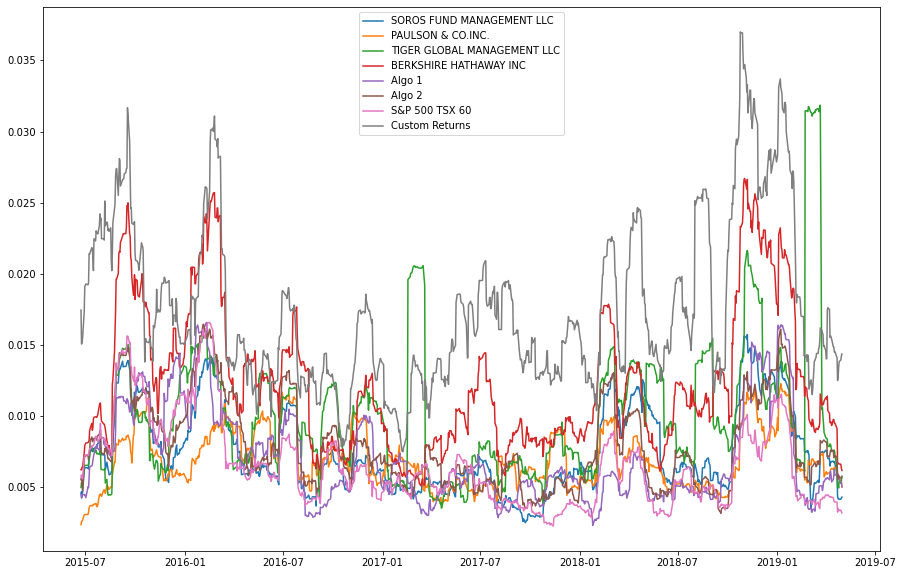

In [47]:
# Plot rolling standard deviation
rolling_all_std.plot(figsize=(15,10))

### Calculate and plot the correlation

In [48]:
# Calculate and plot the correlation
all_returns_correlation = custom_combined_returns.corr()
all_returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 TSX 60,Custom Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.695623,0.552810,0.749389,0.315826,0.827076,0.674037,0.543068
PAULSON & CO.INC.,0.695623,1.000000,0.425502,0.538227,0.272423,0.672749,0.486151,0.398046
TIGER GLOBAL MANAGEMENT LLC,0.552810,0.425502,1.000000,0.416480,0.160550,0.497673,0.436009,0.328381
BERKSHIRE HATHAWAY INC,0.749389,0.538227,0.416480,1.000000,0.291142,0.683363,0.555565,0.622286
Algo 1,0.315826,0.272423,0.160550,0.291142,1.000000,0.293117,0.311391,0.178701
Algo 2,0.827076,0.672749,0.497673,0.683363,0.293117,1.000000,0.740761,0.542061
S&P 500 TSX 60,0.674037,0.486151,0.436009,0.555565,0.311391,0.740761,1.000000,0.445060
Custom Returns,0.543068,0.398046,0.328381,0.622286,0.178701,0.542061,0.445060,1.000000


<AxesSubplot:>

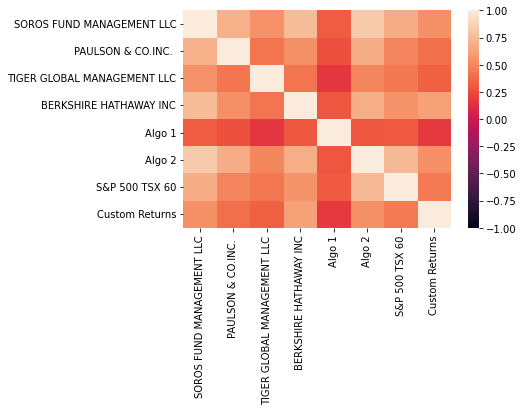

In [49]:
sns.heatmap(all_returns_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Returns'}, xlabel='Date'>

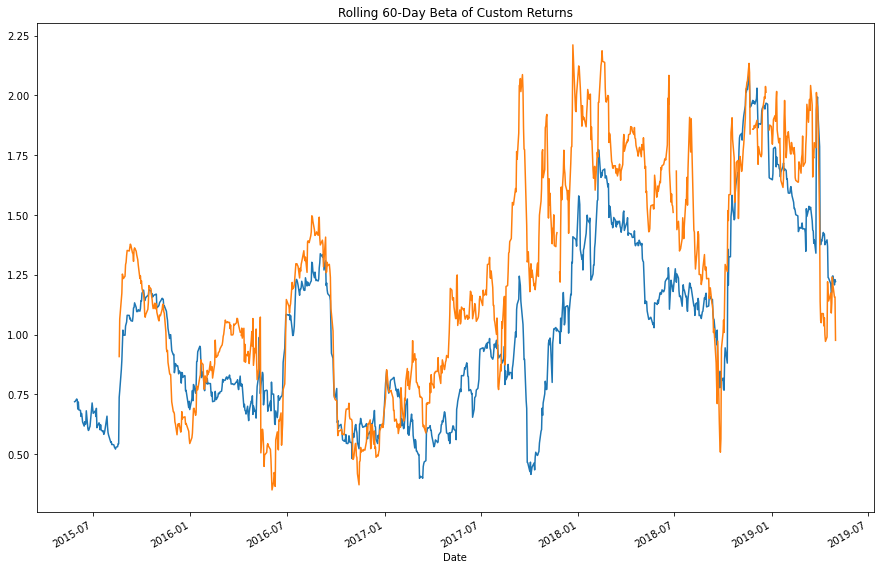

In [50]:
# Calculate and plot Beta
custom_cov = custom_combined_returns['Custom Returns'].rolling(window=60).cov(custom_combined_returns['S&P 500 TSX 60'])
custom_beta = custom_cov / sptsx_var
ay = berkshire_hathaway_beta.plot(figsize=(15,10), title="Rolling 60-Day Beta of Custom Returns")
custom_beta.plot(ax=ay)

In [51]:
custom_beta.describe()

count    908.000000
mean       1.245008
std        0.456577
min        0.350523
25%        0.872401
50%        1.206447
75%        1.678528
max        2.211193
dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualized Sharpe Ratios
custom_sharpe_ratios = (custom_combined_returns.mean() * 252) / all_std
custom_sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.582991
TIGER GLOBAL MANAGEMENT LLC   -0.137435
S&P 500 TSX 60                 0.232130
SOROS FUND MANAGEMENT LLC      0.272527
Algo 2                         0.408027
BERKSHIRE HATHAWAY INC         0.505584
Custom Returns                 1.128687
Algo 1                         1.513799
dtype: float64

<AxesSubplot:>

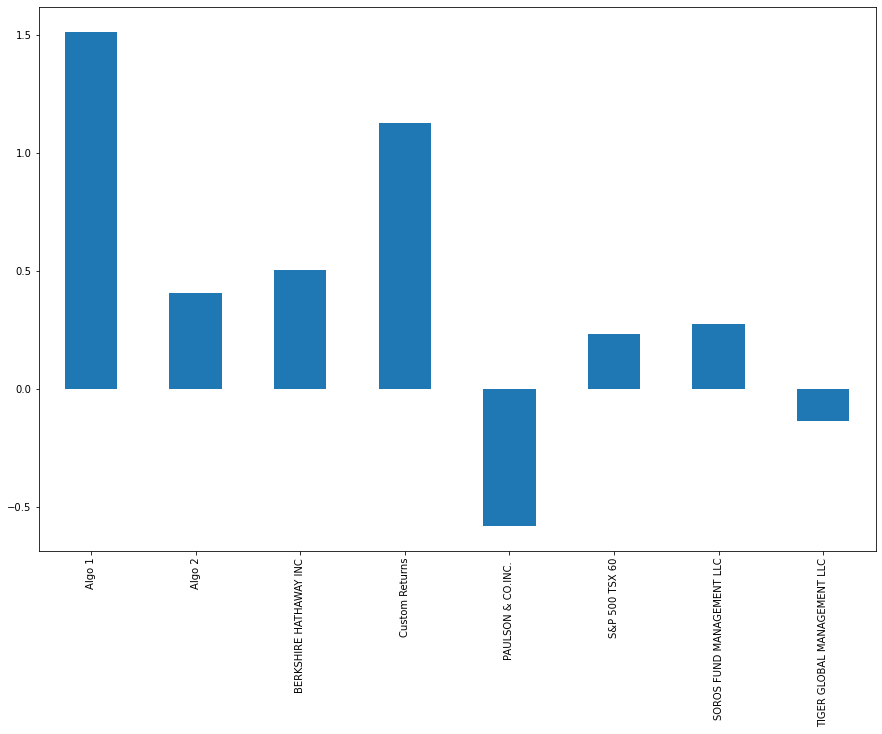

In [53]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(figsize=(15,10), kind='bar')

### How does your portfolio do?

To understand the performance of my portfolio against the others it's important to breakdown and interpret the results of the metrics calculated:

1. 21-day Standard Deviation - 
    My portfolio presents a highly volatile STD with highest of the group at 29%.
    
2. Correlation - 
    My portfolio is the least postively correlated with Algo 1 at 17%. It is most positively correlated to Berkshire Hathaway at 62%. While it's correlation with all other portfolios sit within the range of 32-54%.
    
3. 60-Day Beta - 
    My portfolio is more volatile than the S&P TSX 60 given that it has has a 60-day beta mean of 1.24 with a min at 0.35 and a max at 2.21.

4. Sharpe Ratio - 
    My portfolio is only one of two portfolios to score above 1. It trails behind Algo 1's score of 1.5.
    
Overall, my portfolio performs well compared to the other portfolios. It is a suitable portfolio for someone who has a high risk tolerance due to its level of volatility given it's 21-day standard deviation and 60-day Beta metrics. However, it's Sharpe ratio indicates there is good excess reward to its risk.